# Data Collection

In [3]:
import pandas as pd
from lxml import etree

trainCsv = pd.read_csv("train.csv")
texts= []
labels = []
ids = []

for line in trainCsv.values:
   
    ids.append(line[0])
    xml_file = etree.parse("data/"+line[1])
    file_text = xml_file.xpath("/BODY")[0].text or ''
    texts.append(file_text)
    labels.append(line[2])


collectFrame = pd.DataFrame()
collectFrame["docId"] = ids
collectFrame["text"] = texts
collectFrame["docLabel"] = labels

trainDF = pd.DataFrame()
trainDF["docId"] = ids
trainDF["cat"] = labels

#trainDF
#collectFrame


# Tokenization

In [4]:
import nltk
nltk.download('punkt')

corpus  = []
for doc in texts:
    words = nltk.word_tokenize(doc)
    corpus = corpus+words   
#corpus

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ameli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words ='english',max_features=100)
matrice = vectorizer.fit_transform(texts)
matrix = matrice.toarray()
matindex = matrice.toarray()
#print(matrix)

In [6]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
Matrix = StandardScaler().fit_transform(matrix)


#2D
PCA = PCA(n_components=2)
#Reduire les dimensions de la matrice  de base pour l afficher sur un repere
ComponentsTransformed = PCA.fit_transform(Matrix)
#ComponentsTransformed


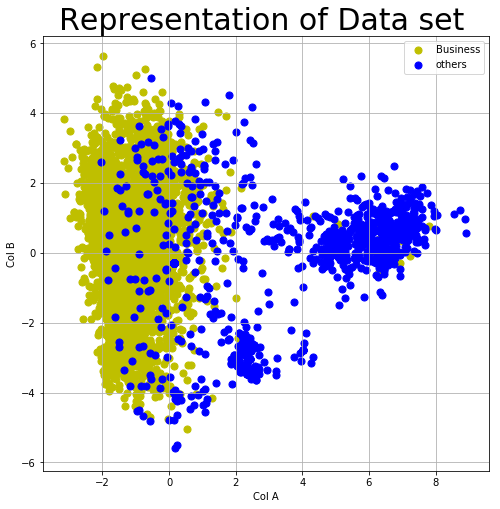

In [7]:
figure = plt.figure(figsize=(8,8))
plan = figure.add_subplot(1,1,1)

plan.set_xlabel('Col A',fontsize=10)
plan.set_ylabel('Col B',fontsize=10)
plan.set_title("Representation of Data set ", fontsize= 30)

legend=['Business','others']
legend_indice = [0,1]
colors=['y','b']

for color,indice in zip(colors,legend_indice):
    indices=collectFrame['docLabel'] == indice
    plan.scatter(ComponentsTransformed[indices,0],ComponentsTransformed[indices,1],c=color,s=50)
plan.legend(legend)
plan.grid()



# Classification

In [32]:
#classification with Knn
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
#print labels
x_train, x_test, y_train, y_test=train_test_split(matindex,labels, test_size=0.20)
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

prediction = classifier.predict(x_test)

from sklearn import svm
classification = svm.SVC(gamma='scale')

classification.fit(x_train,y_train)

predictionSVM = classification.predict(x_test)

from sklearn.neighbors.nearest_centroid import NearestCentroid
classificationCentroid = NearestCentroid()
classificationCentroid.fit(x_train,y_train)

predictionCentroid = classification.predict(x_test)

# Across validation of knn, svm and centroid
### here, we compute the score 10 time of each model and compute the average of these scores. these average scores give us the best model, amoung knn, svm and centroid, to use for our data frame.

In [46]:

def functionScore():
    scoreKnn = 0
    scoreSvm = 0
    scoreC = 0
    for i in range(0,9):
        x_train, x_test, y_train, y_test=train_test_split(matindex,labels, test_size=0.20)
        scaler.fit(x_train)
        x_train = scaler.transform(x_train)
        x_test = scaler.transform(x_test)
        #knn
        classifier.fit(x_train,y_train)
        scoreKnn = scoreKnn +classifier.score(x_test,y_test)
        #svm
        classification.fit(x_train,y_train)
        scoreSvm=scoreSvm+classification.score(x_test,y_test)
        #centroid
        classificationCentroid.fit(x_train,y_train)
        scoreC = scoreC + classificationCentroid.score(x_test,y_test)
        
    print "Average score KNN "
    print scoreKnn/10
    print "Average score SVM"
    print scoreSvm/10
    print "Average score CENTROID"
    print scoreC/10

functionScore();

Average score KNN 
0.8508333333333333
Average score SVM
0.8595833333333335
Average score CENTROID
0.85


# Evaluation

In [43]:
from sklearn.metrics import classification_report,confusion_matrix
# Evalution Knn
print "Without normalization"
print "KNN "
print(classification_report(y_test,prediction))

#Evaluation SVM

print "SVM"
print(classification_report(y_test,predictionSVM))

#Evaluation centroid

print "Centroid"
print(classification_report(y_test,predictionCentroid))



Without normalization
KNN 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       772
           1       0.91      0.81      0.86       188

   micro avg       0.95      0.95      0.95       960
   macro avg       0.93      0.90      0.91       960
weighted avg       0.95      0.95      0.95       960

SVM
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       772
           1       0.94      0.84      0.88       188

   micro avg       0.96      0.96      0.96       960
   macro avg       0.95      0.91      0.93       960
weighted avg       0.96      0.96      0.96       960

Centroid
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       772
           1       0.94      0.84      0.88       188

   micro avg       0.96      0.96      0.96       960
   macro avg       0.95      0.91      0.93       960
weighted avg       0.96      0.96 